In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('C:/Users/Yassine/Desktop/dossier projet youness/train.csv')
train_data.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [3]:
train_data=train_data.drop(columns = ['TweetId'])

In [4]:
train_data.describe()

,Label,TweetText
count,6525,6525
unique,2,6508
top,Sports,'Coaches: Check out the latest content from th...
freq,3325,3


In [5]:
train_data.groupby(['Label']).describe()

TweetText                                                            \
             count unique                                                top   
Label                                                                          
Politics      3200   3191  'RT @HouseofCommons: Prime Minister\u2019s Que...   
Sports        3325   3317  'Coaches: Check out the latest content from th...   

               
         freq  
Label          
Politics    3  
Sports      3

In [6]:
train_data["length"] = train_data["TweetText"].apply(len)
train_data.head()

,Label,TweetText,length
0,Politics,'#SecKerry: The value of the @StateDept and @U...,125
1,Politics,'@rraina1481 I fear so',23
2,Sports,'Watch video highlights of the #wwc13 final be...,102
3,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,121
4,Sports,'@cricketfox Always a good thing. Thanks for t...,62


In [7]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

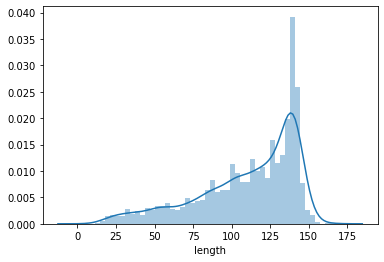

In [8]:
sns.distplot(train_data["length"] , bins = 50)

In [9]:
train_data["length"].describe()

count    6525.000000
mean      110.346820
std        32.234194
min         5.000000
25%        91.000000
50%       119.000000
75%       138.000000
max       167.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF3B7E71C8>,
      dtype=object)

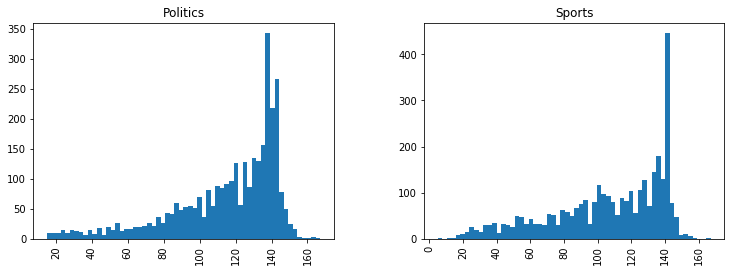

In [10]:
train_data.hist(column="length" , by="Label", bins = 60 ,figsize= (12,4))


In [11]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yassine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def text_process(mess):
    mess = [i for i in mess if i not in string.punctuation]
    mess = "".join(mess)
    return [i for i in mess.split(" ") if i.lower() not in stopwords.words('english')]

In [13]:
train_data["TweetText"].apply(text_process)

0       [SecKerry, value, StateDept, USAID, measured, ...
1                                      [rraina1481, fear]
2       [Watch, video, highlights, wwc13, final, Austr...
3       [RT, chelscanlan, Nitro, Circus, AlbertPark, ,...
4       [cricketfox, Always, good, thing, Thanks, feed...
                              ...                        
6520    [Photo, PM, laid, wreath, Martyrs, Monument, A...
6521    [secret, Chennai, pitch, , crumbling, edges, s...
6522                 [alinabhutto, isnt, Twitter, either]
6523    [England, player, would, take, dinner, Featuri...
6524    [Dmitry, Medvedev, expressed, condolences, fam...
Name: TweetText, Length: 6525, dtype: object

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv = CountVectorizer(text_process).fit(train_data['TweetText'])

In [16]:
mess4 = text_process(train_data['TweetText'][0])
mess4 = " ".join(mess4)
bow4 = cv.transform([mess4])
mess4

'SecKerry value StateDept USAID measured dollars terms deepest American values'

In [17]:
bow=cv.transform(train_data['TweetText'])
bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(bow)

In [19]:
tweets_tfidf = tfidf_transformer.transform(bow)
tweets_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 15068)	0.3550967561692137
  (0, 15066)	0.3149940728058714
  (0, 14952)	0.3204537051945307
  (0, 14023)	0.3342108800792961
  (0, 13449)	0.30197361169532894
  (0, 12678)	0.234708927501156
  (0, 9248)	0.3550967561692137
  (0, 4795)	0.3149940728058714
  (0, 4418)	0.3550967561692137
  (0, 1669)	0.25022493305683896


In [21]:
print (tfidf_transformer.idf_[cv.vocabulary_['value']])


7.70410793547343


In [22]:
print (tfidf_transformer.idf_[cv.vocabulary_['watch']])

4.77291418305701


In [23]:
from sklearn.naive_bayes import MultinomialNB


In [24]:
topic_detect_model = MultinomialNB().fit(tweets_tfidf,train_data['Label'])


In [25]:
print ('Predicted: ',topic_detect_model.predict(tfidf4) )
print ('Expected: ',train_data['Label'][0])

Predicted:  ['Politics']
Expected:  Politics


In [26]:
all_predictions = topic_detect_model.predict(tweets_tfidf)
print (all_predictions)

['Politics' 'Politics' 'Sports' ... 'Sports' 'Sports' 'Politics']


In [27]:
from sklearn.metrics import classification_report
print (classification_report(train_data['Label'], all_predictions))

              precision    recall  f1-score   support

    Politics       0.99      0.98      0.99      3200
      Sports       0.99      0.99      0.99      3325

    accuracy                           0.99      6525
   macro avg       0.99      0.99      0.99      6525
weighted avg       0.99      0.99      0.99      6525



In [28]:
from sklearn.model_selection import train_test_split

tweets_train, tweets_test, label_train, label_test = \
train_test_split(train_data['TweetText'], train_data['Label'], test_size=0.2)

print (len(tweets_train), len(tweets_test), len(label_train), len(label_test))

5220 1305 5220 1305


In [29]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [30]:
pipeline.fit(tweets_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000023948E80678>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [126]:
from sklearn.metrics import confusion_matrix

test_predictions = pipeline.predict(tweets_test)

cm = confusion_matrix(label_test , test_predictions)
cm

array([[587,  36],
       [ 16, 666]], dtype=int64)

In [127]:
from sklearn.metrics import classification_report
print(classification_report(label_test , test_predictions))

              precision    recall  f1-score   support

    Politics       0.97      0.94      0.96       623
      Sports       0.95      0.98      0.96       682

    accuracy                           0.96      1305
   macro avg       0.96      0.96      0.96      1305
weighted avg       0.96      0.96      0.96      1305



In [144]:
test_data = pd.read_csv('C:/Users/Yassine/Desktop/dossier projet youness/test.csv')
test_data.head()

,TweetId,TweetText
0,306486520121012224,'28. The home side threaten again through Maso...
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....
2,289531046037438464,'@Sochi2014 construction along the shores of t...
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...


In [145]:
predictions = pipeline.predict(test_data['TweetText'])

In [146]:
predictions

array(['Sports', 'Sports', 'Politics', ..., 'Sports', 'Politics',
       'Politics'], dtype='<U8')

In [147]:
df = pd.DataFrame(predictions,columns=['Label'])
df['TweetId'] = test_data['TweetId']

In [148]:
df.head()

,Label,TweetId
0,Sports,306486520121012224
1,Sports,286353402605228032
2,Politics,289531046037438464
3,Politics,306451661403062273
4,Sports,297941800658812928


In [150]:
df.to_csv(r'C:\Users\Yassine\prediction_tweets.csv',index = False)

In [151]:
df.head()

,Label,TweetId
0,Sports,306486520121012224
1,Sports,286353402605228032
2,Politics,289531046037438464
3,Politics,306451661403062273
4,Sports,297941800658812928


In [152]:
list(df['TweetId'].value_counts()[df['TweetId'].value_counts() > 1].index)

[]

In [153]:
df2 = pd.read_csv(r'C:\Users\Yassine\prediction_tweets.csv')
df2.head()

,Label,TweetId
0,Sports,306486520121012224
1,Sports,286353402605228032
2,Politics,289531046037438464
3,Politics,306451661403062273
4,Sports,297941800658812928


In [154]:
list(df2['TweetId'].value_counts()[df2['TweetId'].value_counts() > 1].index)

[]